### Downloading the Price datasets


##### TVL from DeFi Lama
BTC: https://defillama.com/chain/Bitcoin <br>
ETH: https://defillama.com/chain/Ethereum <br>
SOL: https://defillama.com/chain/Solana

##### Wikipedia Page Views
ALL: https://pageviews.wmcloud.org/

### **DEPENDENCIES**

In [209]:
# Basic Stack 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib

# Changing the working directory
path = ('P:/6. DSMA/99. Thesis/Github/thesis')
os.chdir(path)

# Import the module
sys.path.append('P:/6. DSMA/99. Thesis/Github/thesis/scripts')
import pipeline_crypto_prices
from pipeline_crypto_prices import get_prices
from camel import thesis_add_index
import camel
import sentiment_analyzer
importlib.reload(pipeline_crypto_prices)
importlib.reload(camel)
importlib.reload(sentiment_analyzer)

<module 'sentiment_analyzer' from 'P:\\6. DSMA/99. Thesis/Github/thesis/scripts\\sentiment_analyzer.py'>

### **RAW DATA**

##### 1. CRYPTO, INDEX, STOCK, AND VIX

In [203]:
btc = get_prices(start_date='2018-01-01')
eth = get_prices('ETH-USD', start_date='2018-01-01')
sol = get_prices('SOL-USD', start_date='2018-01-01')
snp = get_prices('SNP', start_date='2018-01-01', percent_change=True, index=True)
dow = get_prices('Dow', start_date='2018-01-01', percent_change=True, index=True)
vix = get_prices('Vix', start_date='2018-01-01', percent_change=True, index=True).drop('Vix_Volume', axis=1)
gold = get_prices('Gold', start_date='2018-01-01', percent_change=True, index=True)
oil = get_prices('Oil', start_date='2018-01-01', percent_change=True, index=True)
nvidia = get_prices('NVDA', start_date='2018-01-01', percent_change=True, index=True)

Data for BTC-USD from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for ETH-USD from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for SOL-USD from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for SNP from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for Dow from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for Vix from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for Gold from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for Oil from 2018-01-01 to 2024-07-10 has been downloaded successfully
Data for NVDA from 2018-01-01 to 2024-07-10 has been downloaded successfully


In [204]:
Index = pd.merge(snp, dow, on='Date')
Index = pd.merge(Index, vix, on='Date')
Index = pd.merge(Index, gold, on='Date')
Index = pd.merge(Index, oil, on='Date')
Index = pd.merge(Index, nvidia, on='Date')

Index = Index.dropna()
Index.tail(4)

,Date,SNP_Returns,SNP_Volume,Dow_Returns,Dow_Volume,Vix_Returns,Gold_Returns,Gold_Volume,Oil_Returns,Oil_Volume,NVDA_Returns,NVDA_Volume
2377,2024-07-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2378,2024-07-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2379,2024-07-08,0.001017,-0.020722,-0.000789,0.101743,-0.008814,-0.013942,-0.111111,-0.009981,-0.303254,0.018835,0.109725
2380,2024-07-09,0.000741,0.014832,-0.001342,0.008624,0.011318,0.002081,0.000000,-0.011175,0.000000,0.024805,0.200647


##### 2. GTRENDS AND WIKIPEDIA

1. Wikipedia
https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2018-01-01&end=2024-07-09&pages=Bitcoin|Solana|Ethereum|Cryptocurrency|Crypto|Blockchain#

2. Google Trends
https://trends.google.com/trends/explore?date=2024-01-01%202024-07-08&q=crypto&hl=en

Weekly: https://trends.google.com/trends/explore?date=2018-01-01%202024-07-09&q=crypto&hl=en

// Below code loads in all Google Trends Datasets, and the Wikipedia data set and merges them all together

In [205]:
#Gtrends Data
g_btc = pd.read_csv('data/raw/ext/btc_gtrends.csv', header=1)
g_btc.rename(columns={'bitcoin: (Worldwide)': 'BTC_Gtrends'}, inplace=True)
g_eth = pd.read_csv('data/raw/ext/eth_gtrends.csv', header=1)
g_eth.rename(columns={'ethereum: (Worldwide)': 'ETH_Gtrends'}, inplace=True)
g_sol = pd.read_csv('data/raw/ext/sol_gtrends.csv', header=1)
g_sol.rename(columns={'solana: (Worldwide)': 'SOL_Gtrends'}, inplace=True)
g_crypto = pd.read_csv('data/raw/ext/crypto_gtrends.csv', header=1)
g_crypto.rename(columns={'crypto: (Worldwide)': 'Crypto_Gtrends'}, inplace=True)

# Merging all trends data
all_gtrends = pd.merge(g_btc, g_eth, on='Day')
all_gtrends = pd.merge(all_gtrends, g_sol, on='Day')
all_gtrends = pd.merge(all_gtrends, g_crypto, on='Day')
all_gtrends['Total_Gtrends'] = all_gtrends.BTC_Gtrends + all_gtrends.ETH_Gtrends + all_gtrends.SOL_Gtrends + all_gtrends.Crypto_Gtrends
all_gtrends = all_gtrends[['Day', 'Total_Gtrends']]

In [206]:
# Wikipedia Data
wp = pd.read_csv('data/raw/ext/wp.csv')
wp['Total_WP'] = wp['Bitcoin'] + wp['Solana'] + wp['Ethereum'] + wp['Cryptocurrency'] + wp['Crypto'] + wp['Blockchain']
wp = wp[['Date', 'Total_WP']]
#Final External 
all_ext = pd.merge(wp, all_gtrends, left_on='Date', right_on='Day')
all_ext.drop(['Day'], axis=1, inplace=True)
all_ext

# Apply percentage change to the columns
all_ext = camel.convert_to_percentage_change(all_ext, 'Date')
all_ext.Date = pd.to_datetime(all_ext.Date)
#all_ext_pca = camel.pca_v2(all_ext, blacklist=['Date'], n_components=4, n_feat=7)
all_ext_pca['Date'] = all_ext['Date'].reset_index(drop=True)
all_ext.tail(4)
print(all_ext.Date.min())
print(all_ext.Date.max())

2024-01-02 00:00:00
2024-07-08 00:00:00


##### 3. REDDIT SENTIMENT DATA

--__ Extra: https://www.aaii.com/sentimentsurvey/sent_results -> weekly historic sentiment figures

In [105]:
# Load in each dataset
btc_reddit = pd.read_csv('data/raw/reddit/BTC_R.csv')
eth_reddit = pd.read_csv('data/raw/reddit/ETH_R.csv')
sol_reddit = pd.read_csv('data/raw/reddit/SOL_R.csv')

#Merge
all_reddit = pd.concat([btc_reddit, eth_reddit, sol_reddit])
all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted, utc=True)
all_reddit['date_posted'] = all_reddit['date_posted'].dt.strftime('%m/%d/%Y')
all_reddit.date_posted = pd.to_datetime(all_reddit.date_posted)

all_reddit = sentiment_analyzer.main(all_reddit)
all_reddit.to_csv('data/processed/all_reddit_sen.csv')
all_reddit

Processing data...


Analyzing Sentiment: 100%|██████████| 44568/44568 [00:13<00:00, 3190.30it/s]

Overall weighted average sentiment score: 0.1399


,date,weighted_mean_sentiment,unweighted_mean_sentiment,ups
0,2019-07-26,-0.128000,-0.128000,100721
1,2019-07-27,-0.128000,-0.128000,13473
2,2023-06-09,0.717527,0.849829,3592
3,2023-09-06,0.999400,0.999400,2875
4,2024-01-03,-0.261867,-0.182417,6
...,...,...,...,...
163,2024-07-04,0.096209,0.211242,19861
164,2024-07-05,-0.055920,0.291212,20037
165,2024-07-06,0.365589,0.205016,11541
166,2024-07-07,0.233182,0.234392,5081


2024-07-08 00:00:00
2019-07-26 00:00:00


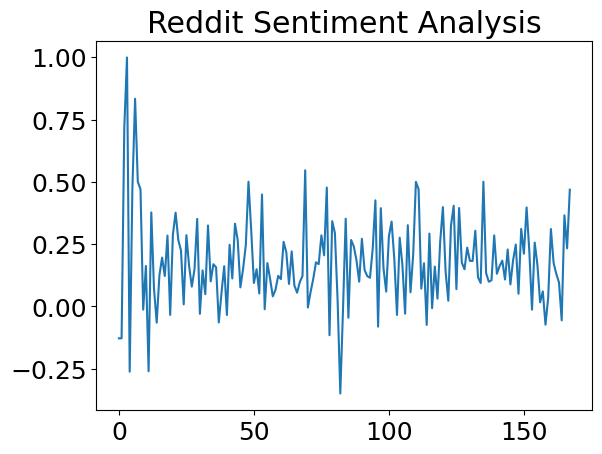

In [207]:
reddit_sen = pd.read_csv('data/processed/all_reddit_sen.csv').drop('Unnamed: 0', axis=1)
reddit_sen.date = pd.to_datetime(reddit_sen.date)
reddit_sen = reddit_sen.rename(columns={'date': 'Date'})
plt.plot(reddit_sen.weighted_mean_sentiment)
plt.title('Reddit Sentiment Analysis')
print(reddit_sen.Date.max())
print(reddit_sen.Date.min())

##### 4. TVL

In [208]:
btc_tvl = pd.read_csv('data/raw/tvl/btc_tvl.csv')
eth_tvl = pd.read_csv('data/raw/tvl/eth_tvl.csv')
sol_tvl = pd.read_csv('data/raw/tvl/sol_tvl.csv')

def tvl_pro(df):
    df = df[:1]
    df = df.melt(var_name='Date', value_name='TVL')
    df = df.drop(index=0).reset_index(drop=True)
    df.Date = pd.to_datetime(df.Date, dayfirst=True)
    return df

btc_tvl, eth_tvl, sol_tvl = tvl_pro(btc_tvl), tvl_pro(eth_tvl), tvl_pro(sol_tvl)
btc_tvl.TVL, eth_tvl.TVL, sol_tvl.TVL = btc_tvl['TVL'].pct_change(), eth_tvl['TVL'].pct_change(), sol_tvl['TVL'].pct_change()

btc_tvl.tail(4)


,Date,TVL
1204,2024-07-08,-0.021147
1205,2024-07-09,-0.212120
1206,2024-07-10,0.017373
1207,2024-07-11,0.000000


### **PROCESSING DATA**

#### 1. TECHNICAL ANALYSIS & PCA

**Input:** 
1. BTC, ETH, and SOL Price Data

**Output:** 
1. Dataframe with all technical indicators for all cryptos condensed to 4 columns
2. Seperate dataframe per crypto with its own Technical Indicators and Trend Determinisitc Technical Indicators


In [210]:
# Make a copy of the dataframe to avoid modifying the original
btc_1 = btc.copy()
eth_1 = eth.copy()
sol_1 = sol.copy()

# Apply technical analysis
btc_1 = camel.technical_analysis(btc, price_col = 'Close', hold_strat=False, only_td=True)
eth_1 = camel.technical_analysis(eth, price_col = 'Close', hold_strat=False, only_td=True)
sol_1 = camel.technical_analysis(sol_1, price_col = 'Close', hold_strat=False, only_td=True)

##### Dimensionality Reduction

In [ ]:
# Apply first PCA per dataset
btc_pca = camel.pca_v2(btc_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
eth_pca = camel.pca_v2(eth_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
sol_pca = camel.pca_v2(sol_1, blacklist=['Date', 'Close'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)

# Apply another round of PCA for combined database.
btc_pca['Date'] = btc_1['Date'].reset_index(drop=True)
eth_pca['Date'] = eth_1['Date'].reset_index(drop=True)
sol_pca['Date'] = sol_1['Date'].reset_index(drop=True)

#Merge all and add suffixes
btc_pca = btc_pca.rename(columns={'PC1': 'PC1_btc', 'PC2': 'PC2_btc', 'PC3': 'PC3_btc', 'PC4': 'PC4_btc'})
eth_pca = eth_pca.rename(columns={'PC1': 'PC1_eth', 'PC2': 'PC2_eth', 'PC3': 'PC3_eth', 'PC4': 'PC4_eth'})
sol_pca = sol_pca.rename(columns={'PC1': 'PC1_sol', 'PC2': 'PC2_sol', 'PC3': 'PC3_sol', 'PC4': 'PC4_sol'})

pca = pd.merge(btc_pca, eth_pca, on='Date')
pca = pd.merge(pca, sol_pca, on='Date')

pca = camel.pca_v2(pca, blacklist=['Date'], n_components=4, n_feat=7, show_explained_variance = False, show_biplot=False)
## This dataset has full technical indicators compressed into 4 variables with 77% explained

pca['Date'] = btc_1['Date'].reset_index(drop=True)

pca

#### Merging

In [212]:
btc_m = pd.merge(btc_1, Index, on='Date')
btc_m = pd.merge(btc_m, all_ext, on='Date')
btc_m = pd.merge(btc_m, reddit_sen, on='Date')
btc_m = pd.merge(btc_m, btc_tvl, on='Date')

eth_m = pd.merge(eth_1, Index, on='Date')
eth_m = pd.merge(eth_m, all_ext, on='Date')
eth_m = pd.merge(eth_m, reddit_sen, on='Date')
eth_m = pd.merge(eth_m, eth_tvl, on='Date')

sol_m = pd.merge(sol_1, Index, on='Date')
sol_m = pd.merge(sol_m, all_ext, on='Date')
sol_m = pd.merge(sol_m, reddit_sen, on='Date')
sol_m = pd.merge(sol_m, sol_tvl, on='Date')

btc_m = camel.thesis_dv(btc_m, hold_strat=False)
btc_m.to_csv('data/processed/camel_v3_btc.csv')

eth_m = camel.thesis_dv(eth_m, hold_strat=False)
eth_m.to_csv('data/processed/camel_v3_eth.csv')

sol_m = camel.thesis_dv(sol_m, hold_strat=False)
sol_m.to_csv('data/processed/camel_v3_sol.csv')